## NHANES 2015-2016 Data Wrangling

Our objective is to identify ways to reduce hospital readmission rates for our client. 

The first step in completing this project is data collection and cleaning. The following are the steps that were taken.

1. Downloaded the datasets of interest from the Centers for Disease Control and Prevention website: https://wwwn.cdc.gov/nchs/nhanes/ContinuousNhanes/Default.aspx?BeginYear=2015.

2. Imported pandas and numpy into the Python notebook, read the SAS files into pandas dataframes, and merged the datasets of interest.


3. Explored the data, taking note of null values and outliers and removing if/when needed:
    - Looked at the size of the dataset and types of values within the different columns.
    
    - Made the dataset smaller by creating a new dataset only containing columns of main interest.
    
    - Null values and Outliers:
        - Observed the data summaries and also created boxplots and histograms of data. 
        
        - Null values: Many of the columns contain null values ('NaN'). We kept these values in the dataset, because not all questions in the questionnaires and all laboratory values were taken from all individuals in the study. Numerical values that were similar to null (i.e., where response was 'refused' or 'don't know', were replaced with 'NaN'. Categorical variables (represented in the dataset by numbers) with the responses 'refused' and 'don't know' were left alone for now.
        - Outliers:  Since the dataset is relatively small in regard to participants who have had >1 overnight hospital stay in the last year, and also in regard to participants with cardiovascular disease, we left all other outliers in the dataset for now.


### Importing pandas library (for data manipulation and analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### We imported the SAS data files into pandas dataframes, then merged the dataframes together.


In [2]:

df_acq = pd.read_sas('NHANES/ACQ_I_acculturation.XPT')
df_bmx = pd.read_sas('NHANES/BMX_I_body_measures.xpt')
df_demo = pd.read_sas('NHANES/DEMO_I_demographics.XPT')
df_diq = pd.read_sas('NHANES/DIQ_I_diabetes.xpt')
df_dpq = pd.read_sas('NHANES/DPQ_I_depression.xpt')
df_dxx = pd.read_sas('NHANES/DXX_I_dexa.xpt')
df_fsq = pd.read_sas('NHANES/FSQ_I_food_security.xpt')
df_huq = pd.read_sas('NHANES/HUQ_I_hospitalization.XPT')
df_hiq = pd.read_sas('NHANES/HIQ_I_health_insurance.xpt')
df_inq = pd.read_sas('NHANES/INQ_I_income.xpt')
df_mcq = pd.read_sas('NHANES/MCQ_I_medical_conditions.XPT')


#Merging the dataframes together into one large dataframe
df_full = df_acq.merge(df_bmx, on='SEQN', how='outer').merge(df_demo, on='SEQN', how='outer')\
.merge(df_diq, on='SEQN', how='outer').merge(df_dpq, on='SEQN', how ='outer') \
.merge(df_dxx, on='SEQN', how='outer').merge(df_fsq, on='SEQN', how='outer').merge(df_huq, on='SEQN', how='outer')\
.merge(df_hiq, on='SEQN', how='outer').merge(df_inq, on='SEQN', how='outer').merge(df_mcq, on='SEQN', how='outer')

#Confirming pandas dataframe has been created
type(df_full)


pandas.core.frame.DataFrame

In [3]:
# Exploring the dataset
print(df_full.head())
print(df_full.tail())

      SEQN  ACD011A  ACD011B  ACD011C  ACD040  ACD110  BMDSTATS  BMXWT  BMIWT  \
0  83732.0      1.0      NaN      NaN     NaN     NaN       1.0   94.8    NaN   
1  83733.0      NaN      NaN      9.0     NaN     NaN       1.0   90.4    NaN   
2  83734.0      1.0      NaN      NaN     NaN     NaN       1.0   83.4    NaN   
3  83735.0      1.0      NaN      NaN     NaN     NaN       1.0  109.8    NaN   
4  83736.0      1.0      NaN      NaN     NaN     NaN       3.0   55.2    NaN   

   BMXRECUM  ...  MCQ300C  MCQ365A  MCQ365B  MCQ365C  MCQ365D  MCQ370A  \
0       NaN  ...      1.0      2.0      1.0      2.0      2.0      1.0   
1       NaN  ...      1.0      2.0      2.0      2.0      2.0      2.0   
2       NaN  ...      2.0      2.0      1.0      1.0      1.0      1.0   
3       NaN  ...      9.0      1.0      1.0      2.0      1.0      1.0   
4       NaN  ...      9.0      2.0      2.0      2.0      2.0      2.0   

   MCQ370B  MCQ370C  MCQ370D  OSQ230  
0      1.0      2.0      2.0 

In [4]:
df_full.columns

Index(['SEQN', 'ACD011A', 'ACD011B', 'ACD011C', 'ACD040', 'ACD110', 'BMDSTATS',
       'BMXWT', 'BMIWT', 'BMXRECUM',
       ...
       'MCQ300C', 'MCQ365A', 'MCQ365B', 'MCQ365C', 'MCQ365D', 'MCQ370A',
       'MCQ370B', 'MCQ370C', 'MCQ370D', 'OSQ230'],
      dtype='object', length=409)

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9971 entries, 0 to 9970
Columns: 409 entries, SEQN to OSQ230
dtypes: float64(409)
memory usage: 31.2 MB


In [6]:
#selecting a few columns of interest. 
#SEQN = study participant ID
#RIAGENDR = participant's gender; 
#RIDAGEYR = Current age of participant;
# MCQ160b = 'Have you ever been told you have congestive heart failure? (Y/N); 
# MCQ180b = Age when told you had heart failure; 
# MCQ160c = 'Have you ever been told you had coronary heart disease?'(Y/N)
# MCQ180c = Age of onset of coronary heart disease
# MCQ160d = 'Have you ever been told you have angina/angina pectoris? (Y/N); 
# MCQ180d = Age of onset of angina/angina pectoris 
# MCQ160e = 'Ever told you had a heart attack'(Y/N)
# MCQ180e = Age when told you had a heart attack
# MCQ160f = 'Have you ever been told you had a stroke?'(Y/N)
# MCQ180f = Age when told you had a stroke

# HUD080 = Number of hospital stays in the last year (participant answered 1 or more hospital stays to this question)

df_selected = df_full[['SEQN', 'RIAGENDR', 'RIDAGEYR', 'MCQ160B', 'MCQ180B', 'MCQ160C', 'MCQ180C','MCQ160D',\
                       'MCQ180D', 'MCQ160E', 'MCQ180E', 'MCQ160F', 'MCQ180F', 'HUQ071', 'HUD080', 'ACD040']]
df_selected.columns


Index(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'MCQ160B', 'MCQ180B', 'MCQ160C',
       'MCQ180C', 'MCQ160D', 'MCQ180D', 'MCQ160E', 'MCQ180E', 'MCQ160F',
       'MCQ180F', 'HUQ071', 'HUD080', 'ACD040'],
      dtype='object')

In [7]:
#Viewing data types and count of non-null elements for selected columns.
df_selected.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9971 entries, 0 to 9970
Data columns (total 16 columns):
SEQN        9971 non-null float64
RIAGENDR    9971 non-null float64
RIDAGEYR    9971 non-null float64
MCQ160B     5719 non-null float64
MCQ180B     214 non-null float64
MCQ160C     5719 non-null float64
MCQ180C     244 non-null float64
MCQ160D     5719 non-null float64
MCQ180D     133 non-null float64
MCQ160E     5719 non-null float64
MCQ180E     251 non-null float64
MCQ160F     5719 non-null float64
MCQ180F     209 non-null float64
HUQ071      9971 non-null float64
HUD080      869 non-null float64
ACD040      2882 non-null float64
dtypes: float64(16)
memory usage: 1.3 MB


In [8]:
#Decided to not remove null values at this time, since all questions do not apply to all study participants of interest

In [9]:
#Viewing summary of data for each series that is numeric.
df_selected.describe()

,SEQN,RIAGENDR,RIDAGEYR,MCQ160B,MCQ180B,MCQ160C,MCQ180C,MCQ160D,MCQ180D,MCQ160E,MCQ180E,MCQ160F,MCQ180F,HUQ071,HUD080,ACD040
count,9971.000000,9971.000000,9.971000e+03,5719.000000,2.140000e+02,5719.000000,244.000000,5719.000000,133.000000,5719.000000,251.000000,5719.000000,209.000000,9971.000000,869.000000,2882.000000
mean,88717.000000,1.509377,3.189941e+01,1.976045,2.288393e+03,1.989159,2105.020492,1.998426,1385.278195,1.967127,2047.545817,1.969575,1968.540670,1.915655,116.545455,2.920194
std,2878.524101,0.499937,2.476883e+01,0.362099,1.452350e+04,0.515131,14188.418440,0.416305,10938.594615,0.346324,13992.501625,0.280130,13726.376453,0.315762,3392.183886,1.498078
min,83732.000000,1.000000,5.397605e-79,1.000000,5.397605e-79,1.000000,10.000000,1.000000,10.000000,1.000000,20.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,86224.500000,1.000000,9.000000e+00,2.000000,4.900000e+01,2.000000,49.750000,2.000000,41.000000,2.000000,48.500000,2.000000,47.000000,2.000000,1.000000,1.000000
50%,88717.000000,2.000000,2.700000e+01,2.000000,5.800000e+01,2.000000,58.000000,2.000000,50.000000,2.000000,57.000000,2.000000,59.000000,2.000000,1.000000,3.000000
75%,91209.500000,2.000000,5.300000e+01,2.000000,6.800000e+01,2.000000,67.000000,2.000000,58.000000,2.000000,66.000000,2.000000,69.000000,2.000000,2.000000,4.000000
max,93702.000000,2.000000,8.000000e+01,9.000000,9.999900e+04,9.000000,99999.000000,9.000000,99999.000000,9.000000,99999.000000,9.000000,99999.000000,9.000000,99999.000000,9.000000


In [10]:
print(df_selected.info())

# In the summary above, many of the columns don't make a lot of sense, since # the numbers are a reference to
# categorical variables. Others (for example, 'MCQ180C') don't make sense because some null values are coded as
# '99999', '77777', '999', and '777'. Here, we will recode these as 'NaN'.

df_selected = df_selected.replace([99999, 77777, 777, 999], np.nan)




<class 'pandas.core.frame.DataFrame'>
Int64Index: 9971 entries, 0 to 9970
Data columns (total 16 columns):
SEQN        9971 non-null float64
RIAGENDR    9971 non-null float64
RIDAGEYR    9971 non-null float64
MCQ160B     5719 non-null float64
MCQ180B     214 non-null float64
MCQ160C     5719 non-null float64
MCQ180C     244 non-null float64
MCQ160D     5719 non-null float64
MCQ180D     133 non-null float64
MCQ160E     5719 non-null float64
MCQ180E     251 non-null float64
MCQ160F     5719 non-null float64
MCQ180F     209 non-null float64
HUQ071      9971 non-null float64
HUD080      869 non-null float64
ACD040      2882 non-null float64
dtypes: float64(16)
memory usage: 1.3 MB
None


In [11]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9971 entries, 0 to 9970
Data columns (total 16 columns):
SEQN        9971 non-null float64
RIAGENDR    9971 non-null float64
RIDAGEYR    9971 non-null float64
MCQ160B     5719 non-null float64
MCQ180B     209 non-null float64
MCQ160C     5719 non-null float64
MCQ180C     239 non-null float64
MCQ160D     5719 non-null float64
MCQ180D     131 non-null float64
MCQ160E     5719 non-null float64
MCQ180E     246 non-null float64
MCQ160F     5719 non-null float64
MCQ180F     205 non-null float64
HUQ071      9971 non-null float64
HUD080      868 non-null float64
ACD040      2882 non-null float64
dtypes: float64(16)
memory usage: 1.3 MB


In [12]:
#Viewing summary of all columns to confirm that the numeric elements containing 'refused' and 'missing' answers have been 
# changed to null.
df_selected.describe()

,SEQN,RIAGENDR,RIDAGEYR,MCQ160B,MCQ180B,MCQ160C,MCQ180C,MCQ160D,MCQ180D,MCQ160E,MCQ180E,MCQ160F,MCQ180F,HUQ071,HUD080,ACD040
count,9971.000000,9971.000000,9.971000e+03,5719.000000,2.090000e+02,5719.000000,239.000000,5719.000000,131.000000,5719.000000,246.000000,5719.000000,205.000000,9971.000000,868.000000,2882.000000
mean,88717.000000,1.509377,3.189941e+01,1.976045,5.714354e+01,1.989159,57.029289,1.998426,49.358779,1.967127,56.662602,1.969575,55.751220,1.915655,1.473502,2.920194
std,2878.524101,0.499937,2.476883e+01,0.362099,1.422749e+01,0.515131,12.925903,0.416305,13.016007,0.346324,12.620197,0.280130,17.013304,0.315762,0.962018,1.498078
min,83732.000000,1.000000,5.397605e-79,1.000000,5.397605e-79,1.000000,10.000000,1.000000,10.000000,1.000000,20.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,86224.500000,1.000000,9.000000e+00,2.000000,4.800000e+01,2.000000,49.000000,2.000000,41.000000,2.000000,48.000000,2.000000,47.000000,2.000000,1.000000,1.000000
50%,88717.000000,2.000000,2.700000e+01,2.000000,5.800000e+01,2.000000,57.000000,2.000000,50.000000,2.000000,57.000000,2.000000,58.000000,2.000000,1.000000,3.000000
75%,91209.500000,2.000000,5.300000e+01,2.000000,6.800000e+01,2.000000,66.000000,2.000000,58.000000,2.000000,66.000000,2.000000,68.000000,2.000000,2.000000,4.000000
max,93702.000000,2.000000,8.000000e+01,9.000000,8.000000e+01,9.000000,80.000000,9.000000,80.000000,9.000000,80.000000,9.000000,80.000000,9.000000,6.000000,9.000000


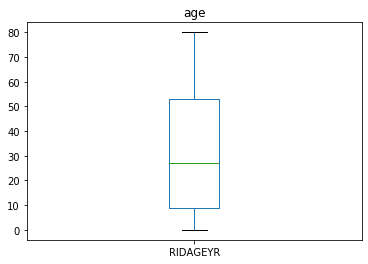

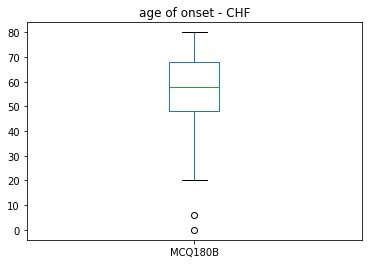

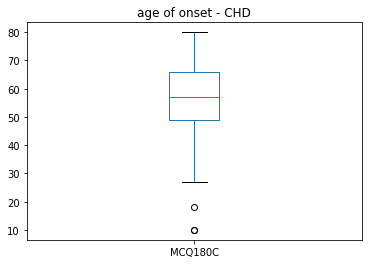

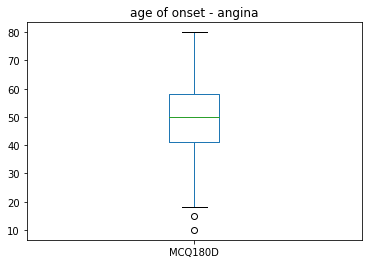

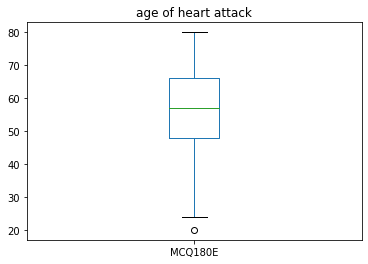

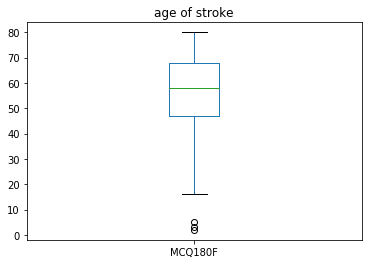

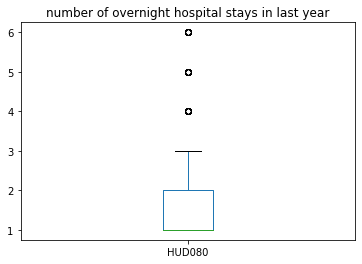

In [13]:
#Viewing boxplot for each variable that is numeric; Note that there are a few outliers participants 
# who had cardiovascular disease onset during childhood. During analysis, will most likely remove all participants
# under the age of 20, since they were managed differently than adults during the collection of data and there
# are only a few of these outliers.

df_selected.RIDAGEYR.plot(kind='box', title='age')
plt.show()
df_selected.MCQ180B.plot(kind='box', title='age of onset - CHF')
plt.show()
df_selected.MCQ180C.plot(kind='box', title='age of onset - CHD')
plt.show()
df_selected.MCQ180D.plot(kind='box', title='age of onset - angina')
plt.show()
df_selected.MCQ180E.plot(kind='box', title= 'age of heart attack')
plt.show()
df_selected.MCQ180F.plot(kind='box', title= 'age of stroke')
plt.show()
df_selected.HUD080.plot(kind='box', title='number of overnight hospital stays in last year')
plt.show()



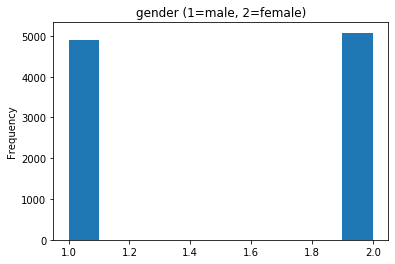

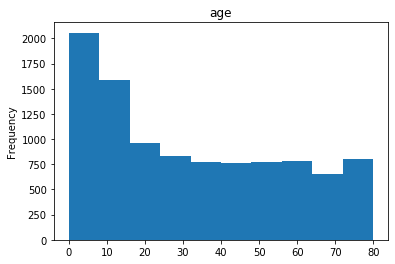

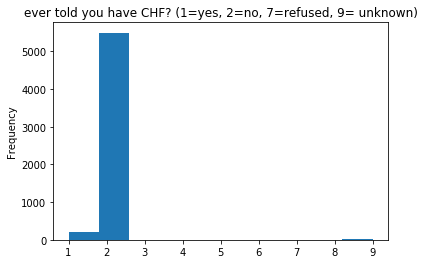

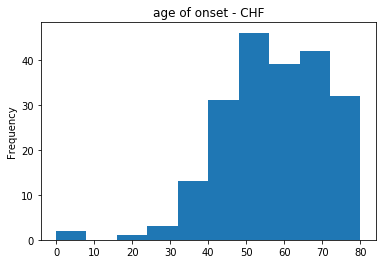

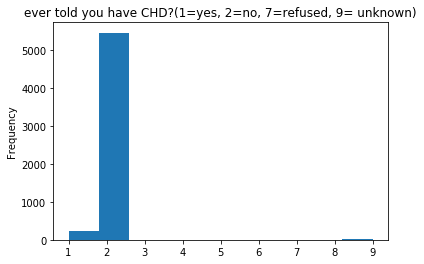

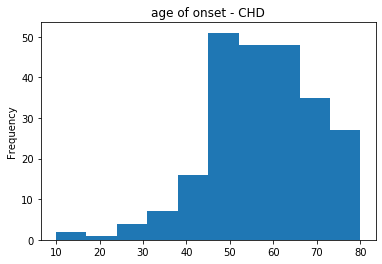

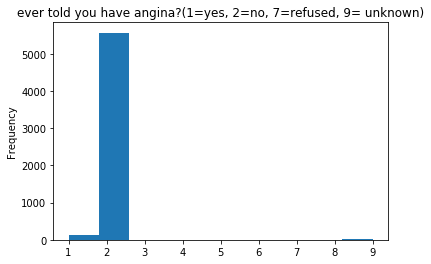

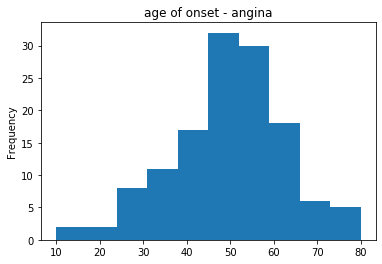

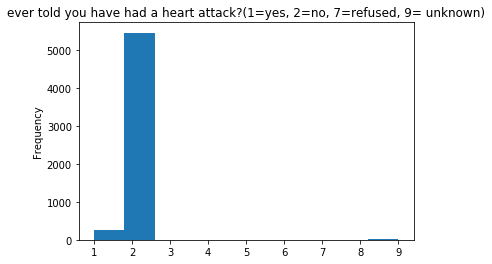

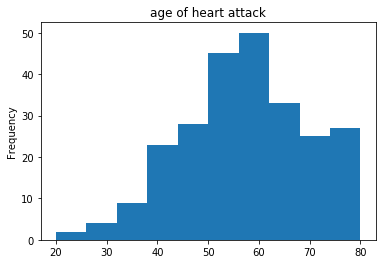

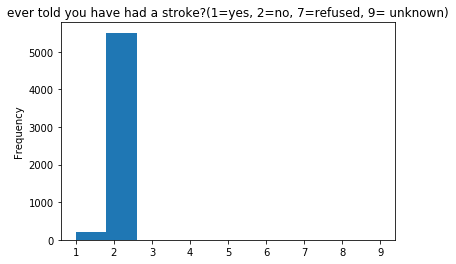

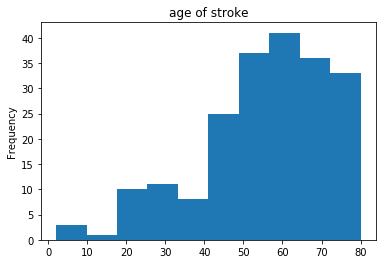

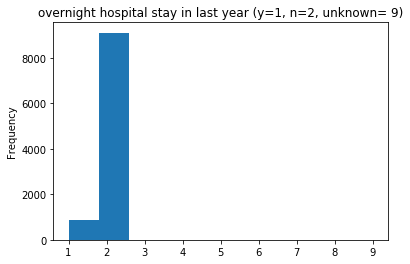

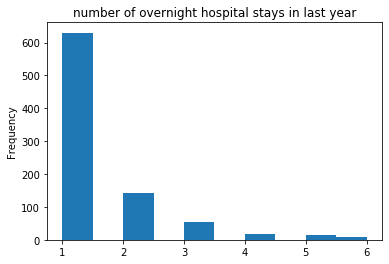

In [14]:
df_selected.RIAGENDR.plot(kind='hist', title='gender (1=male, 2=female)')
plt.show()
df_selected.RIDAGEYR.plot(kind='hist', title='age')
plt.show()
df_selected.MCQ160B.plot(kind='hist', title='ever told you have CHF? (1=yes, 2=no, 7=refused, 9= unknown)')
plt.show()
df_selected.MCQ180B.plot(kind='hist', title='age of onset - CHF')
plt.show()
df_selected.MCQ160C.plot(kind='hist', title='ever told you have CHD?(1=yes, 2=no, 7=refused, 9= unknown)')
plt.show()
df_selected.MCQ180C.plot(kind='hist', title='age of onset - CHD')
plt.show()
df_selected.MCQ160D.plot(kind='hist', title='ever told you have angina?(1=yes, 2=no, 7=refused, 9= unknown)')
plt.show()
df_selected.MCQ180D.plot(kind='hist', title='age of onset - angina')
plt.show()
df_selected.MCQ160E.plot(kind='hist', title='ever told you have had a heart attack?(1=yes, 2=no, 7=refused, 9= unknown)')
plt.show()
df_selected.MCQ180E.plot(kind='hist', title= 'age of heart attack')
plt.show()
df_selected.MCQ160F.plot(kind='hist', title='ever told you have had a stroke?(1=yes, 2=no, 7=refused, 9= unknown)')
plt.show()
df_selected.MCQ180F.plot(kind='hist', title= 'age of stroke')
plt.show()
df_selected.HUQ071.plot(kind='hist', title='overnight hospital stay in last year (y=1, n=2, unknown= 9)')
plt.show()
df_selected.HUD080.plot(kind='hist', title='number of overnight hospital stays in last year')
plt.show()
